<a href="https://colab.research.google.com/github/ricardoV94/ThinkBayesPymc3/blob/master/ThinkBayes_Chapter_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%%capture
pip install arviz

In [0]:
import numpy as np
import pymc3 as pm
import theano.tensor as tt
import arviz as az
import matplotlib.pyplot as plt
import seaborn as sns

## 9.1 Paintball

In [0]:
def StrafingSpeed(alpha, beta, x):
    theta = tt.arctan2(x-alpha, beta)
    speed = beta / tt.cos(theta)**2
    return speed

In [0]:
with pm.Model() as m_9_3:

    obs_beta = pm.Data('obs_beta', [10])

    alpha = pm.Uniform('alpha', lower=0, upper=31, observed=10)
    beta = pm.Uniform('beta', lower=1, upper=51, observed=obs_beta)
    location = pm.Uniform('location', lower=0, upper=31)

    speed = pm.Deterministic('speed', StrafingSpeed(alpha, beta, location))
    like = pm.Potential('like', -np.log(speed)) # Equivalent to 1/speed

In [5]:
traces_m_9_3 = []
for beta in (10, 20, 40):
    with m_9_3:
        pm.set_data({'obs_beta': [beta]})
        traces_m_9_3.append(pm.sample(5000, progressbar=False))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [location]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [location]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [location]


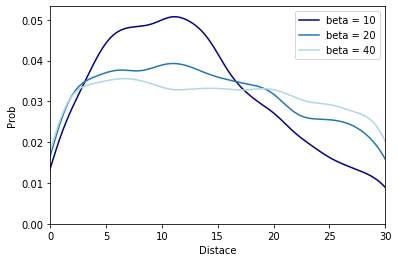

In [6]:
sns.kdeplot(traces_m_9_3[0]['location'], label='beta = 10', color='darkblue')
sns.kdeplot(traces_m_9_3[1]['location'], label='beta = 20')
sns.kdeplot(traces_m_9_3[2]['location'], label='beta = 40', color='lightblue')
plt.xlim([0,30])
plt.xlabel('Distace')
plt.ylabel('Prob');

### 9.5 Joint distributions
Results are very different from those of the book. Posterior is much more narrow.

In [7]:
with pm.Model() as m_9_5:

    alpha = pm.Uniform('alpha', lower=0, upper=31)
    beta = pm.Uniform('beta', lower=1, upper=51)
    location = pm.Uniform('location', lower=0, upper=31, observed=[15, 16, 18, 21])

    speed = pm.Deterministic('speed', StrafingSpeed(alpha, beta, location))
    like = pm.Potential('like', -tt.log(speed))

    trace_m_9_5 = pm.sample(5000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [beta, alpha]
100%|██████████| 5500/5500 [00:03<00:00, 1414.00it/s]
The number of effective samples is smaller than 25% for some parameters.


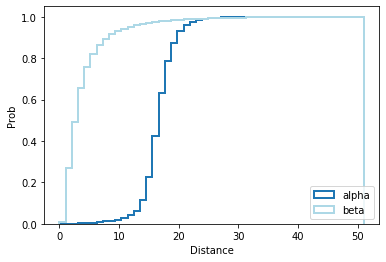

In [8]:
bins = np.linspace(0, 51, 50)
plt.hist(trace_m_9_5['alpha'], cumulative=True, bins=bins, density=True, histtype='step', lw=2, label='alpha')
plt.hist(trace_m_9_5['beta'],  cumulative=True, bins=bins, density=True, histtype='step', lw=2, color='lightblue', label='beta')
plt.ylabel('Prob')
plt.xlabel('Distance')
plt.legend(loc=4);

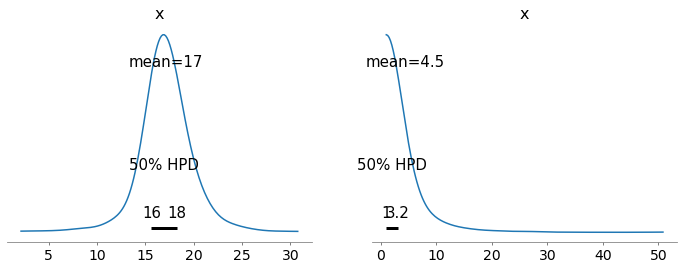

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))
pm.plot_posterior(trace_m_9_5['alpha'], credible_interval=.5, ax=ax[0])
pm.plot_posterior(trace_m_9_5['beta'], credible_interval=.5, ax=ax[1])

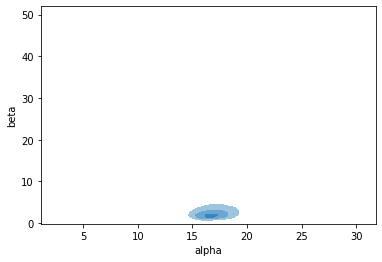

In [10]:
sns.kdeplot(trace_m_9_5['alpha'], trace_m_9_5['beta'], shade=True, n_levels=3, shade_lowest=False);
plt.ylabel('beta')
plt.xlabel('alpha');

### 9.6 Conditional Distributions

In [0]:
with pm.Model() as m_9_6:

    obs_beta = pm.Data('obs_beta', 10)

    alpha = pm.Uniform('alpha', lower=0, upper=31)
    beta = pm.Uniform('beta', lower=1, upper=51, observed=obs_beta)
    location = pm.Uniform('location', lower=0, upper=31, observed=[15, 16, 18, 21])

    speed = pm.Deterministic('speed', StrafingSpeed(alpha, beta, location))
    like = pm.Potential('like', -np.log(speed))

In [12]:
traces_m_9_6 = []
for beta in (10, 20, 40):
    with m_9_6:
        pm.set_data({'obs_beta': beta})
        traces_m_9_6.append(pm.sample(5000, progressbar=False))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [alpha]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [alpha]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [alpha]


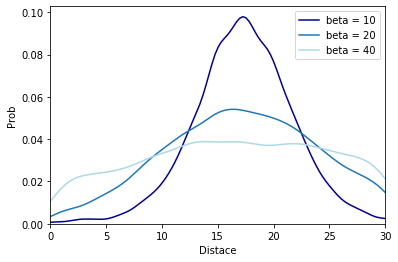

In [13]:
sns.kdeplot(traces_m_9_6[0]['alpha'], label='beta = 10', color='darkblue')
sns.kdeplot(traces_m_9_6[1]['alpha'], label='beta = 20')
sns.kdeplot(traces_m_9_6[2]['alpha'], label='beta = 40', color='lightblue')
plt.xlim([0,30])
plt.xlabel('Distace')
plt.ylabel('Prob');